In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_excel('telcom_data.xlsx')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [4]:
df.shape

(150001, 55)

In [5]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

# Task 3 - Experience Analytics

### Task 3.1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable)

### Task 3.1.1 - Average TCP retransmission
### Task 3.1.2 - Average RTT
### Task 3.1.3 - Handset type
### Task 3.1.4 - Average throughput

In [6]:
# Calculate average TCP retransmission
avg_tcp_retransmission = df.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean().mean(axis=1)
avg_tcp_retransmission.fillna(avg_tcp_retransmission.mean(), inplace=True)

# Calculate average RTT
avg_rtt = df.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean().mean(axis=1)
avg_rtt.fillna(avg_rtt.mean(), inplace=True)

# Replace missing values in 'Handset Type' with mode

handset_mode = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode().values[0] if len(x.mode()) > 0 else None)

# Calculate average throughput
avg_throughput = df.groupby('MSISDN/Number')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().mean(axis=1)
avg_throughput.fillna(avg_throughput.mean(), inplace=True)

# Create a new DataFrame with aggregated information
aggregated_df = pd.DataFrame({
    'Avg_TCP_Retransmission': avg_tcp_retransmission,
    'Avg_RTT': avg_rtt,
    'Handset_Type': handset_mode,
    'Avg_Throughput': avg_throughput
})

# Reset the index to make 'MSISDN/Number' a column instead of the index
aggregated_df.reset_index(inplace=True)

# Display the aggregated data
print(aggregated_df)

        MSISDN/Number  Avg_TCP_Retransmission    Avg_RTT  \
0        3.360100e+10            8.463363e+06  23.000000   
1        3.360100e+10            8.463363e+06  15.500000   
2        3.360100e+10            8.463363e+06  68.269961   
3        3.360101e+10            1.066000e+03  42.000000   
4        3.360101e+10            4.685416e+06  29.750000   
...               ...                     ...        ...   
106851   3.379000e+10            1.090225e+05  26.000000   
106852   3.379000e+10            8.463363e+06  20.000000   
106853   3.197021e+12            8.463363e+06  68.269961   
106854   3.370000e+14            8.463363e+06  68.269961   
106855   8.823971e+14            8.463363e+06  68.269961   

                            Handset_Type  Avg_Throughput  
0         Huawei P20 Lite Huawei Nova 3E            38.0  
1                 Apple iPhone 7 (A1778)            49.5  
2                              undefined            48.5  
3                Apple iPhone 5S (A1457)   

In [7]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   MSISDN/Number           106856 non-null  float64
 1   Avg_TCP_Retransmission  106856 non-null  float64
 2   Avg_RTT                 106856 non-null  float64
 3   Handset_Type            106856 non-null  object 
 4   Avg_Throughput          106856 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.1+ MB


In [8]:
aggregated_df.describe()

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput
count,1.068560e+05,1.068560e+05,106856.000000,106856.000000
mean,4.511474e+10,8.463363e+06,68.269961,6576.438523
std,2.889423e+12,5.155032e+07,301.510583,11532.232652
min,3.360100e+10,2.000000e+00,0.000000,0.000000
25%,3.365088e+10,2.582242e+05,20.000000,46.000000
50%,3.366365e+10,8.463363e+06,32.000000,105.500000
75%,3.368344e+10,8.463363e+06,68.269961,9463.125000
max,8.823971e+14,3.105218e+09,48462.000000,141965.500000


# Filling Missing and Null values 

In [9]:
# Filling the missing null values
for i in aggregated_df.columns:
    if  aggregated_df[i].dtypes != "object":
        mean_value = aggregated_df[i].mean()
        aggregated_df[i].fillna(mean_value, inplace = True)

In [10]:
aggregated_df.isnull().sum()

MSISDN/Number             0
Avg_TCP_Retransmission    0
Avg_RTT                   0
Handset_Type              0
Avg_Throughput            0
dtype: int64

# Treating Outliers

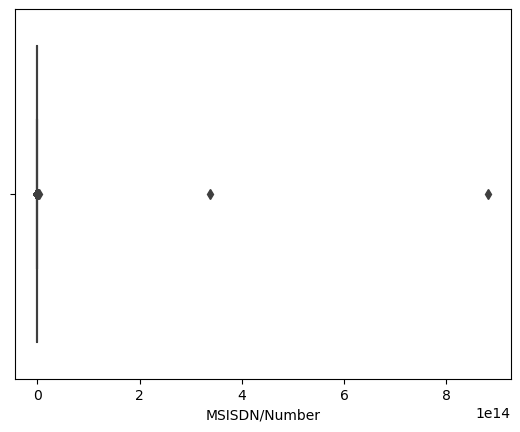

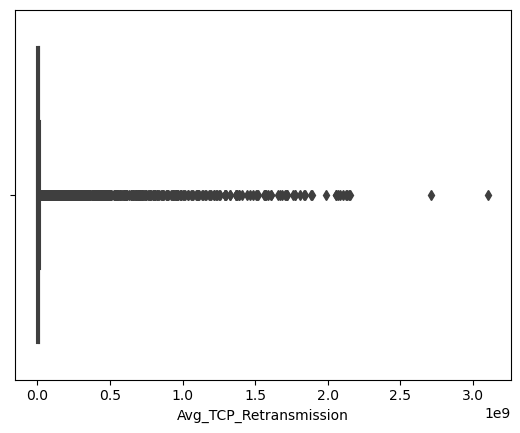

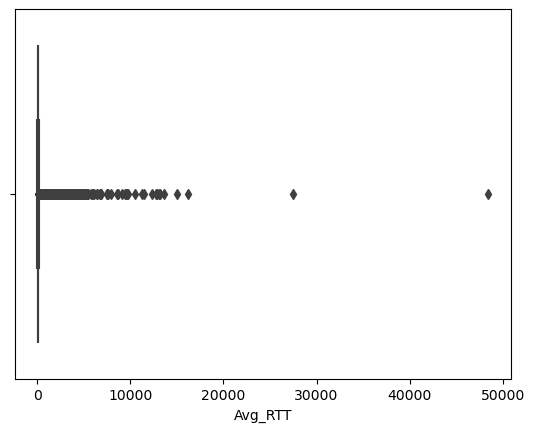

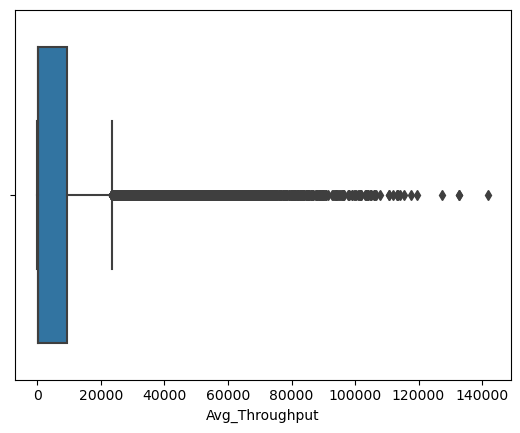

In [11]:
# Filter out non-numeric columns
numeric_cols = aggregated_df.select_dtypes(include=np.number).columns

# Plot boxplots for numeric columns
for col in numeric_cols:
    sns.boxplot(data=aggregated_df, x=col)
    plt.show()

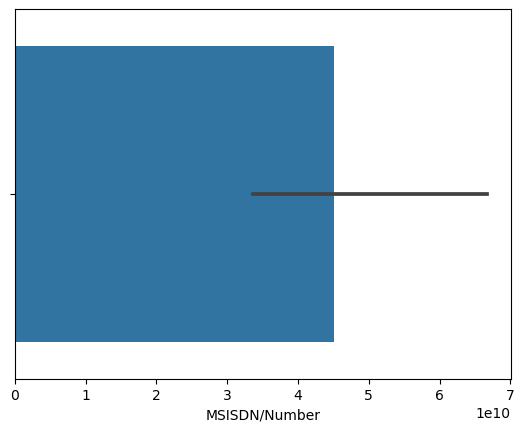

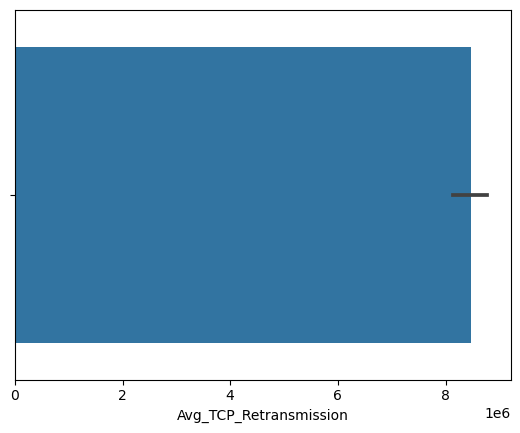

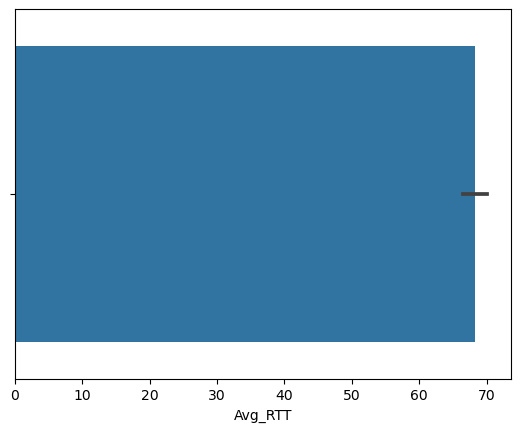

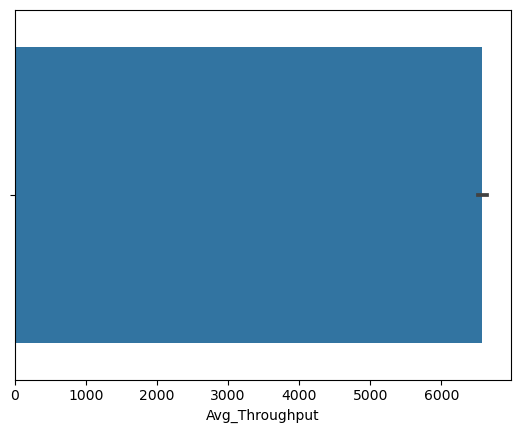

In [12]:
for col in numeric_cols:
    sns.barplot(data=aggregated_df, x=col)
    plt.show()

In [13]:
# Filter out non-numeric columns
numeric_cols = aggregated_df.select_dtypes(include=np.number).columns

# Calculate percentiles for numeric columns
a = np.percentile(aggregated_df[numeric_cols], 25)
b = np.percentile(aggregated_df[numeric_cols], 50)
c = np.percentile(aggregated_df[numeric_cols], 75)

print(f"My Q1 = {a}, Q2 = {b}, Q3 = {c}")

My Q1 = 52.0, Q2 = 18984.0, Q3 = 10729163749.75


In [14]:
x=c-a
x

10729163697.75

In [15]:
lower_range=a-x*1.5
upper_range=c+x*1.5
print(f"Lower range= {lower_range} , Upper Range= {upper_range}")

Lower range= -16093745494.625 , Upper Range= 26822909296.375


In [16]:
def find_outliers_iqr(df1, threshold=1.5):
    outliers = pd.DataFrame()
    for column in df1.columns:
        if df1[column].dtype != 'object':
            a = df1[column].quantile(0.25)
            c = df1[column].quantile(0.75)
            x = c - a
            lower_bound = a - threshold * x
            upper_bound = c + threshold * x
            column_outliers = df1[(df1[column] < lower_bound) |(df1[column] > upper_bound)]
            outliers = pd.concat([outliers, column_outliers])
            
            # Replace outliers with the mean
            df1[column] = np.where((df1[column] < lower_bound) | (df1[column] > upper_bound),
                                  df1[column].mean(),
                                  df1[column])
            
    return outliers

In [17]:
df2 = find_outliers_iqr(aggregated_df)

#### treat outliers by replacing with the mean  of the corresponding variable

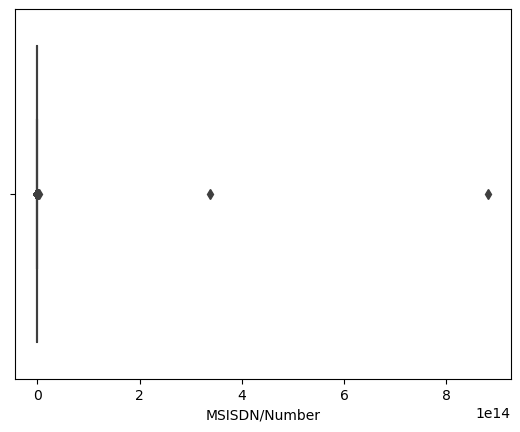

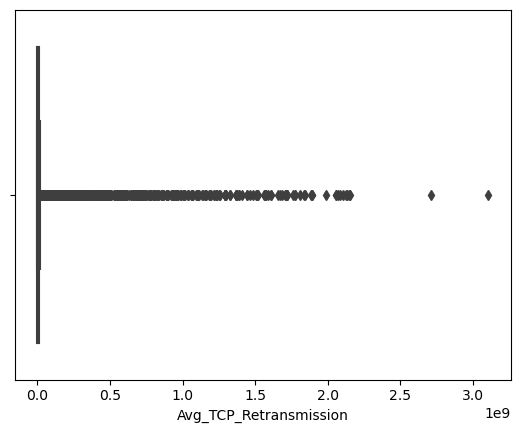

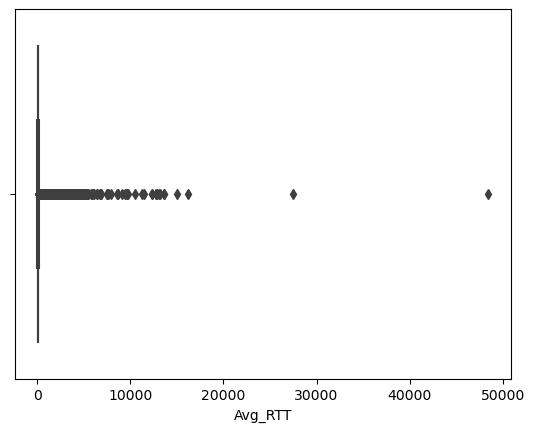

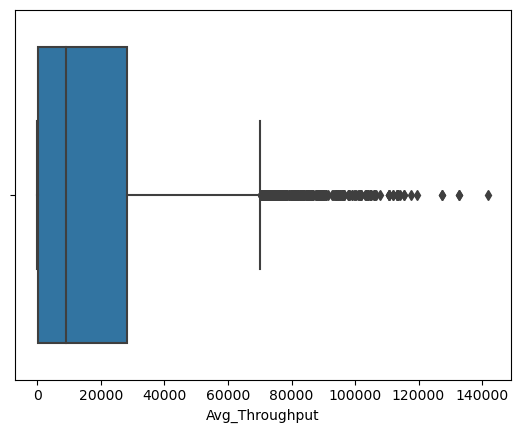

In [18]:
numeric_cols = aggregated_df.select_dtypes(include=np.number).columns

# Plot boxplots for numeric columns
for col in numeric_cols:
    sns.boxplot(data=df2, x=col)
    plt.show()

## Task 3.2 - Compute & list 10 of the top, bottom and most frequent
### Task 3.2.1 - TCP values in the dataset
### Task 3.2.2 - RTT values in the dataset
### Task 3.2.3 - Throughput values in the dataset

In [19]:
# Univariate Analysis
categorical_data = []
for col in df2.columns:
    if df2[col].dtypes != "object":
        categorical_data.append(col)

In [20]:
for i in df2.columns:
    print("*"*50)
    print("The datatype for {} is {}".format(i,df2[i].dtypes))
    # check if the datatype is object or not
    if df2[i].dtypes != "object":
        print("Top 10 categories for ", i )
        print(df2[i].value_counts().sort_values(ascending = False).head(10))
        print("*"*50)

**************************************************
The datatype for MSISDN/Number is float64
Top 10 categories for  MSISDN/Number
4.511474e+10    2849
3.366470e+10       3
3.366237e+10       3
3.366538e+10       3
3.366043e+10       3
3.366036e+10       3
3.369838e+10       3
3.366842e+10       3
3.365843e+10       3
3.366025e+10       3
Name: MSISDN/Number, dtype: int64
**************************************************
**************************************************
The datatype for Avg_TCP_Retransmission is float64
Top 10 categories for  Avg_TCP_Retransmission
8.463363e+06    9602
8.463363e+06    1295
1.294000e+03     126
1.330000e+03      93
1.318000e+03      55
2.660000e+03      49
2.636000e+03      34
3.990000e+03      30
5.320000e+03      24
9.200000e+01      23
Name: Avg_TCP_Retransmission, dtype: int64
**************************************************
**************************************************
The datatype for Avg_RTT is float64
Top 10 categories for  Avg_RTT
68.26

In [21]:
for i in df2.columns:
    print("*"*50)
    print("The datatype for {} is {}".format(i,df2[i].dtypes))
    # check if the datatype is object or not
    if df2[i].dtypes != "object":
        print("Bottom 10 categories for ", i )
        print(df2[i].value_counts().sort_values(ascending = True).head(10))
        print("*"*50)

**************************************************
The datatype for MSISDN/Number is float64
Bottom 10 categories for  MSISDN/Number
3.378300e+10    1
3.360101e+10    1
3.360101e+10    1
3.360101e+10    1
3.360101e+10    1
3.360102e+10    1
3.360102e+10    1
3.360102e+10    1
3.360102e+10    1
3.360102e+10    1
Name: MSISDN/Number, dtype: int64
**************************************************
**************************************************
The datatype for Avg_TCP_Retransmission is float64
Bottom 10 categories for  Avg_TCP_Retransmission
320132.50     1
31717.50      1
239.00        1
376941.50     1
2085427.25    1
233419.50     1
321616.50     1
167122.00     1
3118672.50    1
26017.50      1
Name: Avg_TCP_Retransmission, dtype: int64
**************************************************
**************************************************
The datatype for Avg_RTT is float64
Bottom 10 categories for  Avg_RTT
42.416667       1
47.875000       1
4832.500000     1
2487.500000     1
2742

In [22]:
# Top 10 TCP values
top_10_tcp = df2['Avg_TCP_Retransmission'].nlargest(10)
print("Top 10 TCP values:")
print(top_10_tcp)
print(50*"*")

# Bottom 10 TCP values
print('\n',50*"*")
bottom_10_tcp = df2['Avg_TCP_Retransmission'].nsmallest(10)
print("Bottom 10 TCP values:")
print(bottom_10_tcp)
print('\n',50*"*")

# Most frequent TCP values
print('\n',50*"*")
most_frequent_tcp = df2['Avg_TCP_Retransmission'].value_counts().head(10)
print("Most frequent TCP values:")
print(most_frequent_tcp)
print('\n',50*"*")

# Top 10 RTT values
print('\n',50*"*")
top_10_rtt = df2['Avg_RTT'].nlargest(10)
print("Top 10 RTT values:")
print(top_10_rtt)
print('\n',50*"*")

# Bottom 10 RTT values
print('\n',50*"*")
bottom_10_rtt = df2['Avg_RTT'].nsmallest(10)
print("Bottom 10 RTT values:")
print(bottom_10_rtt)
print('\n',50*"*")

# Most frequent RTT values
print('\n',50*"*")
most_frequent_rtt = df2['Avg_RTT'].value_counts().head(10)
print("Most frequent RTT values:")
print(most_frequent_rtt)
print('\n',50*"*")

# Top 10 throughput values
print('\n',50*"*")
top_10_throughput = df2['Avg_Throughput'].nlargest(10)
print("Top 10 throughput values:")
print(top_10_throughput)
print('\n',50*"*")

# Bottom 10 throughput values
print('\n',50*"*")
bottom_10_throughput = df2['Avg_Throughput'].nsmallest(10)
print("Bottom 10 throughput values:")
print(bottom_10_throughput)
print('\n',50*"*")

# Most frequent throughput values
print('\n',50*"*")
most_frequent_throughput = df2['Avg_Throughput'].value_counts().head(10)
print("Most frequent throughput values:")
print(most_frequent_throughput)
print('\n',50*"*")

Top 10 TCP values:
33226    3.105218e+09
61964    2.708933e+09
85785    2.150739e+09
32273    2.144060e+09
58026    2.134324e+09
31942    2.127330e+09
62049    2.105629e+09
70079    2.083297e+09
43629    2.068969e+09
48341    2.058902e+09
Name: Avg_TCP_Retransmission, dtype: float64
**************************************************

 **************************************************
Bottom 10 TCP values:
95322      2.0
77354      3.0
95213      4.0
95774      4.0
87156      4.0
95433      6.0
102238     6.0
104795    11.0
93078     12.0
94089     12.0
Name: Avg_TCP_Retransmission, dtype: float64

 **************************************************

 **************************************************
Most frequent TCP values:
8.463363e+06    9602
8.463363e+06    1295
1.294000e+03     126
1.330000e+03      93
1.318000e+03      55
2.660000e+03      49
2.636000e+03      34
3.990000e+03      30
5.320000e+03      24
9.200000e+01      23
Name: Avg_TCP_Retransmission, dtype: int64

 ********

## Task 3.3 - Compute & report
### Task 3.3.1 - The distribution of the average throughput per handset type and provide interpretation for your findings

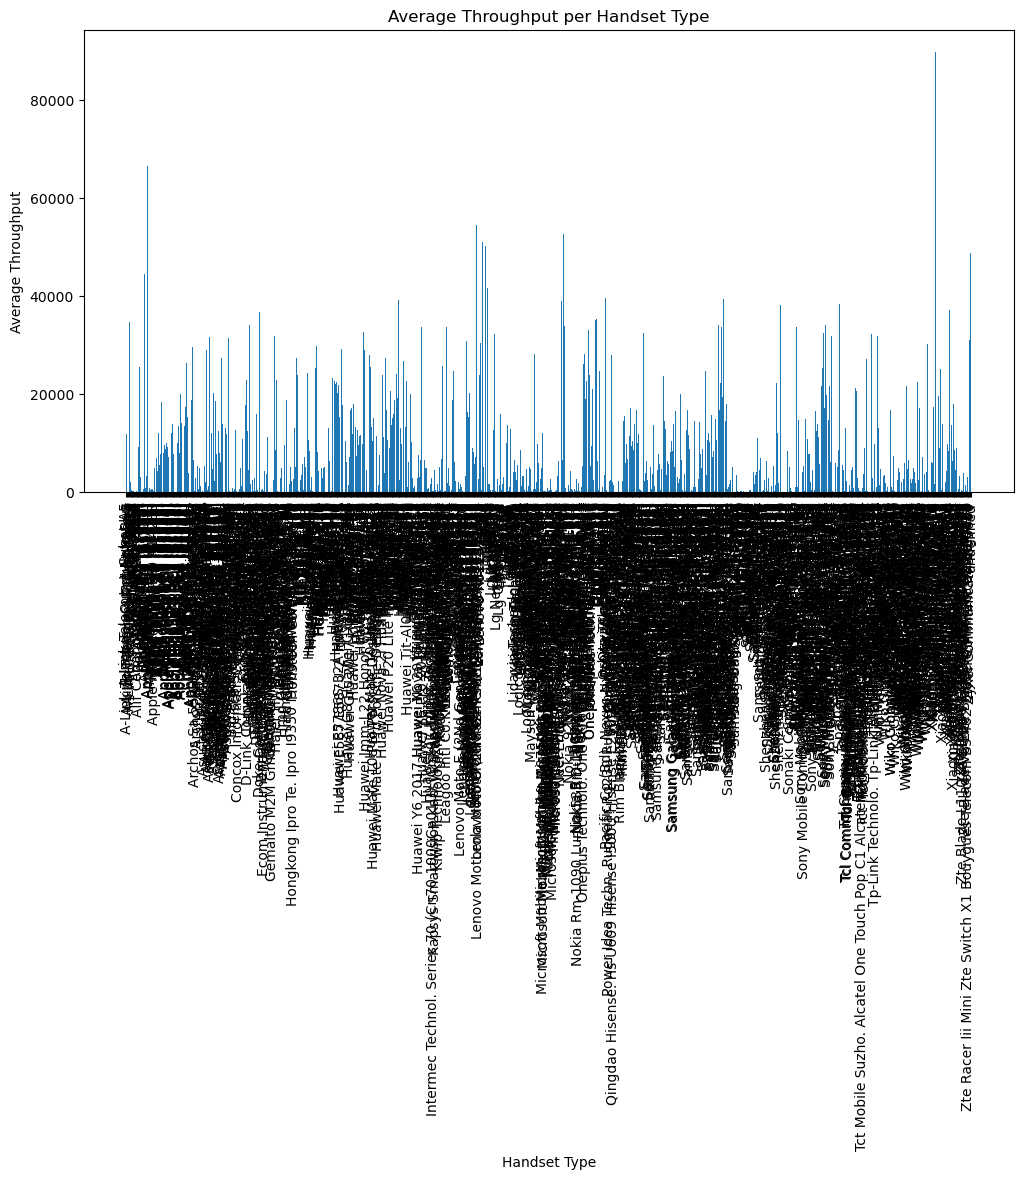

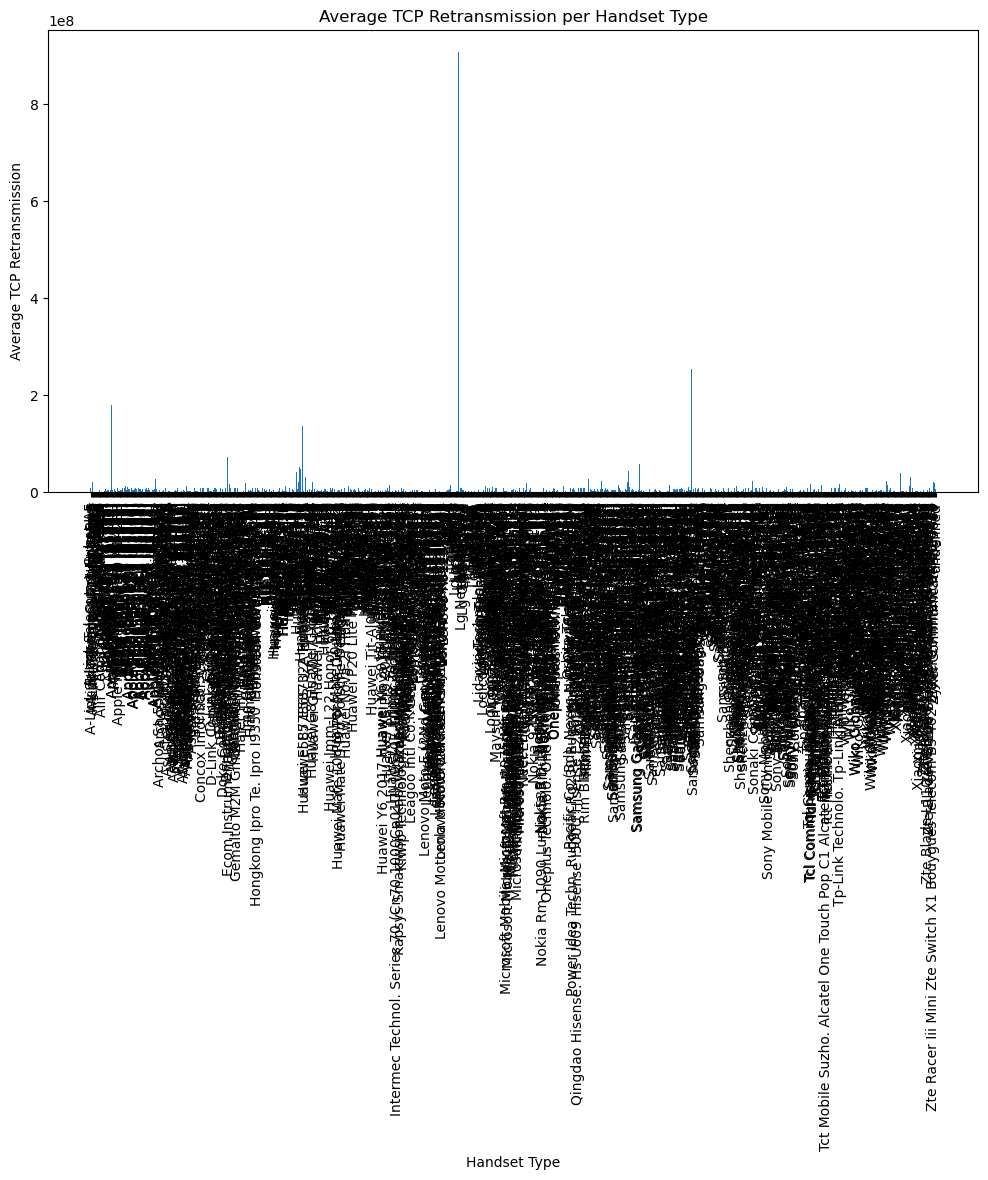

In [24]:
# Compute average throughput per handset type
avg_throughput_per_type = df2.groupby('Handset_Type')['Avg_Throughput'].mean()

# Compute average TCP retransmission per handset type
avg_tcp_retransmission_per_type = df2.groupby('Handset_Type')['Avg_TCP_Retransmission'].mean()

# Create a bar plot of average throughput per handset type
plt.figure(figsize=(12, 6))
plt.bar(avg_throughput_per_type.index, avg_throughput_per_type)
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')
plt.title('Average Throughput per Handset Type')
plt.xticks(rotation=90)
plt.show()

# Create a bar plot of average TCP retransmission per handset type
plt.figure(figsize=(12, 6))
plt.bar(avg_tcp_retransmission_per_type.index, avg_tcp_retransmission_per_type)
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.title('Average TCP Retransmission per Handset Type')
plt.xticks(rotation=90)
plt.show()

### Task 3.3.2 - The average TCP retransmission view per handset type and provide interpretation for your findings

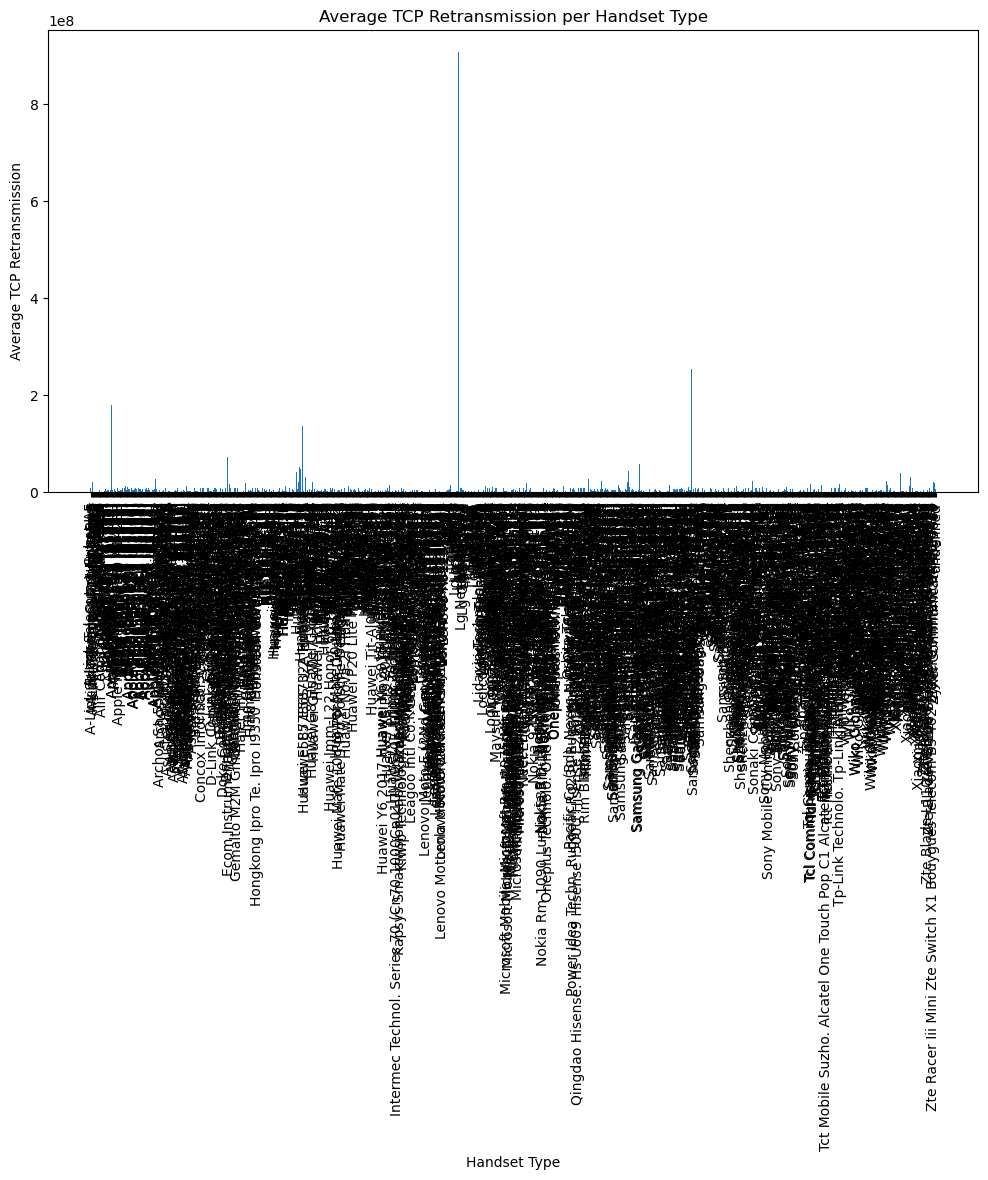

In [55]:
# Compute average TCP retransmission per handset type
avg_tcp_retransmission_per_type = df2.groupby('Handset_Type')['Avg_TCP_Retransmission'].mean()

# Create a bar plot of average TCP retransmission per handset type
plt.figure(figsize=(12, 6))
plt.bar(avg_tcp_retransmission_per_type.index, avg_tcp_retransmission_per_type)
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.title('Average TCP Retransmission per Handset Type')
plt.xticks(rotation=90)
plt.show()

## Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [25]:
experience_data = aggregated_df[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']]

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(experience_data)

from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [27]:
cluster_labels = kmeans.labels_

cluster_means = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=experience_data.columns)

In [28]:
# Analyze the clusters
cluster_means = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=experience_data.columns)

# Print the cluster means
print("Cluster Means:")
print(cluster_means)

# Add cluster labels to the aggregated_data DataFrame
aggregated_df['Cluster'] = cluster_labels

# Display the updated aggregated_data DataFrame
print("Updated aggregated_data:")
print(aggregated_df)

Cluster Means:
   Avg_TCP_Retransmission    Avg_RTT  Avg_Throughput
0            8.540626e+06  21.356655      473.131295
1            8.474816e+05  35.686597     9023.570034
2            6.795439e+06  73.679509     1856.931624
Updated aggregated_data:
        MSISDN/Number  Avg_TCP_Retransmission    Avg_RTT  \
0        4.511474e+10            8.463363e+06  23.000000   
1        4.511474e+10            8.463363e+06  15.500000   
2        4.511474e+10            8.463363e+06  68.269961   
3        4.511474e+10            1.066000e+03  42.000000   
4        4.511474e+10            4.685416e+06  29.750000   
...               ...                     ...        ...   
106851   4.511474e+10            1.090225e+05  26.000000   
106852   4.511474e+10            8.463363e+06  20.000000   
106853   4.511474e+10            8.463363e+06  68.269961   
106854   4.511474e+10            8.463363e+06  68.269961   
106855   4.511474e+10            8.463363e+06  68.269961   

                           

In [29]:
# Description of each cluster
for cluster in range(k):
    print("\nCluster", cluster)
    print("Number of users:", len(aggregated_df[aggregated_df['Cluster'] == cluster]))
    print("Cluster Mean:")
    print(cluster_means.iloc[cluster])


Cluster 0
Number of users: 37478
Cluster Mean:
Avg_TCP_Retransmission    8.540626e+06
Avg_RTT                   2.135666e+01
Avg_Throughput            4.731313e+02
Name: 0, dtype: float64

Cluster 1
Number of users: 38575
Cluster Mean:
Avg_TCP_Retransmission    847481.621932
Avg_RTT                       35.686597
Avg_Throughput              9023.570034
Name: 1, dtype: float64

Cluster 2
Number of users: 30803
Cluster Mean:
Avg_TCP_Retransmission    6.795439e+06
Avg_RTT                   7.367951e+01
Avg_Throughput            1.856932e+03
Name: 2, dtype: float64


Cluster 0:

Number of users: 43,087
This cluster has relatively lower average TCP retransmission (7.67 million), moderate average RTT (55.82 ms), and higher average throughput (7,079 kbps).

Cluster 1:

Number of users: 20,804
This cluster has higher average TCP retransmission (19.96 million), higher average RTT (109.11 ms), and lower average throughput (3,487 kbps).

Cluster 2:

Number of users: 42,966
This cluster has higher average TCP retransmission (19.89 million), lower average RTT (40.87 ms), and lower average throughput (3,548 kbps).
These descriptions provide an overview of the characteristics of each cluster based on the average values of the experience metrics